In [10]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
# Creates dataframe from json file
filename = 'census_data_2018.json'
census_df = pd.read_json(filename)

# Renames the headers
census_df.rename(columns=census_df.iloc[0],inplace=True)
census_df.drop(0,inplace=True)
census_df

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,...,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F,us
1,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,None,3.0,None,8.9,None,7.7,None,7.0,None,1
2,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,None,4.7,None,19.2,None,0.0,None,13.5,None,1
3,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,None,4.7,None,8.2,None,4.8,None,7.4,None,1
4,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,None,5.9,None,4.3,None,5.6,None,6.3,None,1
5,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,None,6.0,None,16.2,None,6.7,None,10.7,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19454,0100000US,United States,21,"Mining, quarrying, and oil and gas extraction",004,Equally male/female,001,Total,92,Nonminority,...,S,0.0,S,0.0,S,0.0,S,0.0,S,1
19455,0100000US,United States,21,"Mining, quarrying, and oil and gas extraction",004,Equally male/female,001,Total,92,Nonminority,...,None,27.8,None,0.0,S,20.0,None,16.7,None,1
19456,0100000US,United States,21,"Mining, quarrying, and oil and gas extraction",004,Equally male/female,001,Total,92,Nonminority,...,None,79.5,None,0.0,S,58.1,None,49.8,None,1
19457,0100000US,United States,21,"Mining, quarrying, and oil and gas extraction",004,Equally male/female,001,Total,92,Nonminority,...,D,0.0,D,0.0,D,0.0,D,0.0,D,1


In [6]:
#drop unnecessary columns
census_df_dropped = census_df.drop(columns=['us','NAICS2017','SEX','GEO_ID','ETH_GROUP','RACE_GROUP','EMP_F','FIRMPDEMP_F','VET_GROUP','EMP_S','FIRMPDEMP_S','FIRMPDEMP_S_F','PAYANN_S','RCPPDEMP_S','RCPPDEMP_F','RCPPDEMP_S_F','EMP_S_F','PAYANN_S_F','PAYANN_F'],axis=1)

In [7]:
#filter out only male/female values
census_df_emp_filtered = census_df_dropped[(census_df_dropped['EMPSZFI_LABEL']!='All firms') & (census_df_dropped['EMPSZFI_LABEL']!='Firms with no employees')]

census_df_filtered_male = census_df_emp_filtered[census_df_emp_filtered['SEX_LABEL'] == 'Male']
census_df_filtered_female = census_df_emp_filtered[census_df_emp_filtered['SEX_LABEL'] == 'Female']
#group by EMPSZFI_Label, return the values in numpy array
census_df_emp_sex_male = census_df_filtered_male.groupby('EMPSZFI_LABEL').agg({'SEX_LABEL':'value_counts'})['SEX_LABEL'].values
census_df_emp_sex_female = census_df_filtered_female.groupby('EMPSZFI_LABEL').agg({'SEX_LABEL':'value_counts'})['SEX_LABEL'].values
census_df_emp = census_df_emp_filtered['EMPSZFI_LABEL'].unique()

In [12]:
#filter out by ethnicity
census_df_filtered_hispanic = census_df_emp_filtered[census_df_dropped['ETH_GROUP_LABEL']=='Hispanic']
census_df_filtered_nohispanic = census_df_emp_filtered[census_df_dropped['ETH_GROUP_LABEL']=='Non-Hispanic']
#group by ethnicity, return the values in numpy array
census_df_emp_eth_hispanic = census_df_filtered_hispanic.groupby('EMPSZFI_LABEL').agg({'ETH_GROUP_LABEL':'value_counts'})['ETH_GROUP_LABEL'].values
census_df_emp_eth_nohispanic = census_df_filtered_nohispanic.groupby('EMPSZFI_LABEL').agg({'ETH_GROUP_LABEL':'value_counts'})['ETH_GROUP_LABEL']
type(census_df_emp_eth_nohispanic)

/var/folders/1m/cryjf7b56hj14d537cgrgjhw0000gn/T/ipykernel_84430/714812289.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  census_df_filtered_hispanic = census_df_emp_filtered[census_df_dropped['ETH_GROUP_LABEL']=='Hispanic']
/var/folders/1m/cryjf7b56hj14d537cgrgjhw0000gn/T/ipykernel_84430/714812289.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  census_df_filtered_nohispanic = census_df_emp_filtered[census_df_dropped['ETH_GROUP_LABEL']=='Non-Hispanic']


pandas.core.series.Series

In [ ]:
census_df_emp_filtered.info()
census_df_emp_filtered['RCPPDEMP'] = census_df_emp_filtered.RCPPDEMP.astype(int)
census_df_emp_sales = census_df_emp_filtered.groupby('EMPSZFI_LABEL').agg({'RCPPDEMP':'mean'})['RCPPDEMP'].values/1000

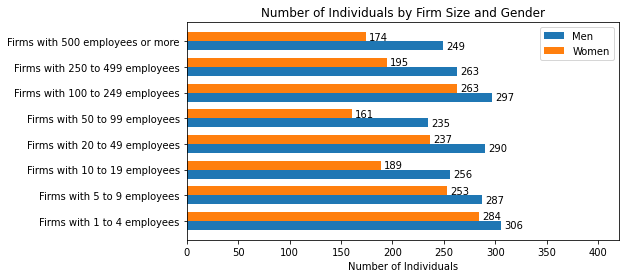

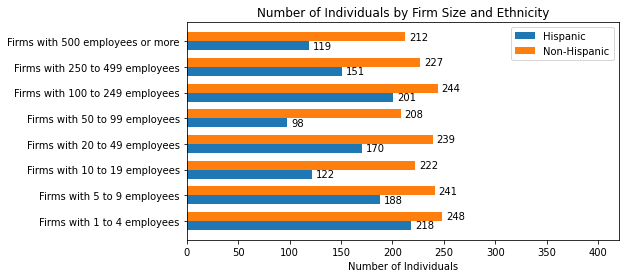

NameError: name 'census_df_emp_sales' is not defined

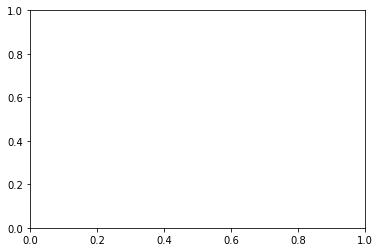

In [11]:
#configure plot

x = np.arange(len(census_df_emp))  # the label locations
width = 0.35  # the width of the bars
#configure plot
fig,ax = plt.subplots()
rects1 = ax.barh(x - width/2, census_df_emp_sex_male, width, label='Men')
rects2 = ax.barh(x + width/2, census_df_emp_sex_female, width, label='Women')
#set labels
ax.set_xlabel('Number of Individuals')
ax.set_title('Number of Individuals by Firm Size and Gender')
#set legend location
ax.legend(loc=0)
#set y axis limit
ax.set_xlim([0, 420])
ax.set_yticks(x,census_df_emp)
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
#make graph wider
fig.subplots_adjust(left=2,right=3)

fig2,ax2 = plt.subplots()
rects1 = ax2.barh(x - width/2, census_df_emp_eth_hispanic, width, label='Hispanic')
rects2 = ax2.barh(x + width/2, census_df_emp_eth_nohispanic, width, label='Non-Hispanic')
#set labels
ax2.set_xlabel('Number of Individuals')
ax2.set_title('Number of Individuals by Firm Size and Ethnicity')
#set legend location
ax2.legend(loc=0)
#set y axis limit
ax2.set_xlim([0, 420])
ax2.set_yticks(x,census_df_emp)
ax2.bar_label(rects1, padding=4)
ax2.bar_label(rects2, padding=4)
#make graph wider
fig2.subplots_adjust(left=2,right=3)
plt.show()

fig3,ax3 = plt.subplots()
rects1 = ax3.barh(x - width/2, census_df_emp_sales, width, label='Annual Sale')
#set labels
ax3.set_xlabel('Sales (thousand $)')
ax3.set_title('Sales by Firm Size')
ax3.set_xlim([0,73000])
#set legend location
#set y axis limit
ax3.set_yticks(x,census_df_emp)
ax3.bar_label(rects1, padding=4)
#make graph wider
fig3.subplots_adjust(left=2,right=3)
plt.show()